# Soccer Stats Showdown  

### Description: 
Imagine you're the Data Scientist for a professional soccer league. The season is heating up, and the league wants to gain insights into team and player performance. They've collected a vast dataset of match statistics, but it's a bit of a mess. That's where you come in!  

### Tasks:  
- **Goal Scoring Analysis:** Calculate the top 5 teams with the highest median goal scoring per match, and display the results in a bar chart.  
- **Player Performance:** Create a histogram showing the distribution of assists among all players in the season.
- **Matchup Insights:** Determine the teams with the highest winning percentage when playing at home, and display the results in a sorted table.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import sys

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 2.2.1
Numpy version 1.26.4


# The Data  

This dataset contains 500 matches, with team and player performance statistics. Your task is to wrangle this data using pandas to extract valuable insights!  

### Columns:  
- **match_id:** a unique identifier for each match.
- **team_home and team_away:** IDs of the teams playing in each match, ranging from 0 to 19. These IDs don't correspond to specific team names, but rather represent different teams in the simulation.  
- **goals_home and goals_away:** the number of goals scored by each team in each match.
- **player_assists and player_goals:** the number of assists and goals scored by a player in each match. 

Good luck, and have fun!

In [2]:
# set the seed
np.random.seed(0)

# declare variables
matches = 500
teams = 20
players = 500

data = {
    'match_id': np.arange(matches),
    'team_home': np.random.choice(teams, matches),
    'team_away': np.random.choice(teams, matches),
    'goals_home': np.random.poisson(lam=1.5, size=matches),
    'goals_away': np.random.poisson(lam=1.0, size=matches)
}

# create dataframe
df = pd.DataFrame(data)

# ensure player does not score more than the team
df['player_goals'] = df.apply(lambda x: np.minimum(np.random.poisson(lam=0.2, size=1), np.maximum(np.random.choice([x['goals_home'], x['goals_away']], 1), 0))[0], axis=1)

# ensure player does have more assists than goals scored
df['player_assists'] = df.apply(lambda x: np.minimum(np.random.poisson(lam=0.2, size=1), np.maximum(np.random.choice([x['player_goals']], 1), 0))[0], axis=1)

df.head()

,match_id,team_home,team_away,goals_home,goals_away,player_goals,player_assists
0,0,12,0,2,0,0,0
1,1,15,9,0,0,0,0
2,2,0,16,3,2,1,0
3,3,3,2,0,2,0,0
4,4,3,8,2,1,0,0


We are expecting all of the columns to be numeric, let's take a look and verify this.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   match_id        500 non-null    int32
 1   team_home       500 non-null    int32
 2   team_away       500 non-null    int32
 3   goals_home      500 non-null    int32
 4   goals_away      500 non-null    int32
 5   player_goals    500 non-null    int32
 6   player_assists  500 non-null    int32
dtypes: int32(7)
memory usage: 13.8 KB


# Goal Scoring Analysis:

Calculate the top 5 teams with the highest goal scoring average per match, and display the results in a bar chart.

In [4]:
home = df[['team_home','goals_home']]
home

,team_home,goals_home
0,12,2
1,15,0
2,0,3
3,3,0
4,3,2
...,...,...
495,18,0
496,14,2
497,18,0
498,1,0


Note: We will try to use the median as the data is not Normally distributed.

You can see that for most of the away matches, the teams seem to score a median of 1 goal. For games where they have a home field advantage, we have a few teams scoring a median of 2 goals per game.

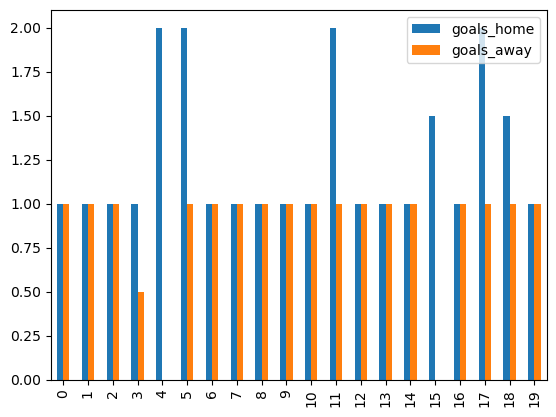

In [5]:
# home team
group = df.groupby('team_home')
group_home = group['goals_home'].median()

# away team
group = df.groupby('team_away')
group_away = group['goals_away'].median()

# combine data
combined = pd.concat([group_home, group_away], axis=1)

combined.plot.bar();

Let's pull out top 5 scoring teams based on the median goals scored at home games. There was a tie for 5th place, team 18 and team 15 both scored a median of 1.5 goals per home game.

In [6]:
group_home.sort_values(ascending=False).head()

team_home
11    2.0
17    2.0
4     2.0
5     2.0
18    1.5
Name: goals_home, dtype: float64

# Player Performance:  

Create a histogram showing the distribution of assists among all players in the season.

As you can see, most players do not have many assists according to the data

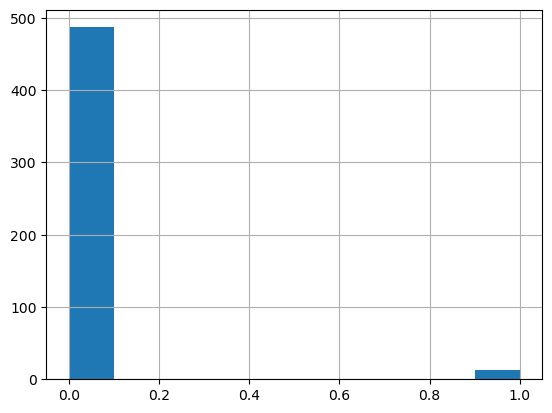

In [7]:
df['player_assists'].sort_values().hist();

If we take a look at some descriptive statistics, we can conclude that there were very few high scoring/assisting players in the season.

In [8]:
df[['goals_home','goals_away','player_goals','player_assists']].describe()

,goals_home,goals_away,player_goals,player_assists
count,500.000000,500.000000,500.000000,500.000000
mean,1.492000,1.040000,0.134000,0.026000
std,1.221852,0.990132,0.352552,0.159295
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,0.000000
max,6.000000,5.000000,2.000000,1.000000


# Conclusion  

In this tutorial, we analyzed a dataset of soccer match statistics to gain insights into team and player performance. We calculated the top 5 teams with the highest median goal scoring per match and created a histogram showing the distribution of assists among all players.

### What You Learned:
- How to calculate goal scoring averages per match
- How to visualize data using bar charts and histograms
- How to extract insights from data 

## Can you solve the BONUS question?  

**Matchup Insights:** Determine the teams with the highest winning percentage when playing at home, and display the results in a sorted table.

<p class="text-muted">This tutorial was created by <a href="https://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>